In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from test_queries import _get_config, test_queries_multi_genre, test_queries_traveler, test_query_detail
from nbc_analysis.utils.debug_utils import runit
from pathlib import Path
import pandas as pd
import numpy as np
from toolz import groupby, pluck
import json
%matplotlib inline

In [3]:
config = _get_config()
config

{'calendar': {'start_day_key': 20170101,
  'end_day_key': 20210101,
  'calendar_d': PosixPath('/Users/wmcabee/DATA/NBC/calendar')},
 'database': {'db_f': PosixPath('/Users/wmcabee/DATA/NBC/test_db.sqlite'),
  'connect_str': 'sqlite:////%s'},
 'demographics': {'demographics_d': PosixPath('/Users/wmcabee/DATA/NBC/demographics'),
  'zip2income_input_f': PosixPath('/Users/wmcabee/_NBC/datasets/ACS_17_5YR_S2503_with_ann.csv'),
  'subnet2zip_input_f': PosixPath('/Users/wmcabee/_NBC/datasets/GeoLite2-City-CSV_20191001.zip')},
 'normalize': {'test_input_d': PosixPath('/Users/wmcabee/DATA/NBC/work/query'),
  'normalize_d': PosixPath('/Users/wmcabee/DATA/NBC/normalize')}}

In [4]:
!pwd

/Users/wmcabee/_NBC/nbc_analysis/tests/queries


In [6]:
with pd.option_context('max_rows', None, 'max_columns', None):
    DATA, ENGINE = runit(test_query_detail)
    display(DATA)
DATA.to_csv('detail_example.csv', index=False)

2019-11-07 06:52:02,216|INFO|nbc_analysis.utils.db_utils|start get db, cfg={'db_f': PosixPath('/Users/wmcabee/DATA/NBC/test_db.sqlite'), 'connect_str': 'sqlite:////%s'}
2019-11-07 06:52:02,217|INFO|nbc_analysis.utils.db_utils|end get_db,connect_str=sqlite://///Users/wmcabee/DATA/NBC/test_db.sqlite


,mpid,event_start_dt,event_name,video_end_type,platform,data_connection_type,mvpd,nbc_profile,video_duration_watched,resume_time,resume,day_utc_key,video_id,video_type,show,season,episode_number,episode_title,genre,network,postal_code,latitude,longitude,country,state,city,occup_housing_units,median_household_income,median_household_costs,time_zone,event_start_local_dt,hour,time_period,hour_in_week_key,day_key_loc,day_name_loc,week_day_loc,month_name_loc,week_id_loc,_file,_file_idx
0,594429747067128960,20190817T10:17:32.819999Z,Video End,Close,Android,wifi,Xfinity,Unauthenticated,0.0,NaN,False,20190817,3819455,Interview,Access,2018,Not Set,Access,News and Information,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-17T06:17:32.819999-04:00,6,morning,126,20190817,Saturday,week end,August,2019W33,NBC_20190817102144655099_75671.txt,4279
1,594429747067128960,20190817T10:15:21.448999Z,Video End,Close,Android,wifi,Xfinity,Unauthenticated,0.0,NaN,False,20190817,3564869,Full Episode,Tia & Tamera,3,5,Boot Camp Brawl,Reality and Game Show,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-17T06:15:21.448999-04:00,6,morning,126,20190817,Saturday,week end,August,2019W33,NBC_20190817102144655099_75671.txt,4279
2,594429747067128960,20190817T10:14:37.394000Z,Video End,Close,Android,wifi,Xfinity,Unauthenticated,0.0,NaN,False,20190817,3564869,Full Episode,Tia & Tamera,3,5,Boot Camp Brawl,Reality and Game Show,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-17T06:14:37.394000-04:00,6,morning,126,20190817,Saturday,week end,August,2019W33,NBC_20190817102211319305_97896.txt,4282
3,594429747067128960,20190817T10:06:58.578999Z,Video End,Close,Android,wifi,Xfinity,Unauthenticated,118.0,7095.0,True,20190817,3837080,Movie,Iron Man,Not Set,Not Set,Iron Man,Drama,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-17T06:06:58.578999-04:00,6,morning,126,20190817,Saturday,week end,August,2019W33,NBC_20190817101201560689_16524.txt,4223
4,594429747067128960,20190817T03:37:07.311000Z,Video End,Background,Android,wifi,Xfinity,Unauthenticated,27.0,1629.0,True,20190817,3837080,Movie,Iron Man,Not Set,Not Set,Iron Man,Drama,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-16T23:37:07.311000-04:00,23,evening,119,20190816,Friday,week day,August,2019W33,NBC_20190817034051520697_86136.txt,1545
5,594429747067128960,20190817T03:01:01.181999Z,Video End,Background,Android,wifi,Xfinity,Unauthenticated,13.0,801.0,True,20190817,3837080,Movie,Iron Man,Not Set,Not Set,Iron Man,Drama,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-16T23:01:01.181999-04:00,23,evening,119,20190816,Friday,week day,August,2019W33,NBC_20190817030539592399_02162.txt,1299
6,594429747067128960,20190817T02:44:07.042999Z,Video End,Close,Android,wifi,Xfinity,Unauthenticated,0.0,NaN,False,20190817,3837080,Movie,Iron Man,Not Set,Not Set,Iron Man,Drama,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-16T22:44:07.042999-04:00,22,evening,118,20190816,Friday,week day,August,2019W33,NBC_20190817024934065454_61706.txt,1180
7,594429747067128960,20190817T02:42:34.874000Z,Video End,Close,Android,wifi,Xfinity,Unauthenticated,0.0,NaN,False,20190817,3680891,Full Episode,This Is Us,2,18,The Wedding,Drama,2601:147:300::/41,21214,39.3529,-76.5743,United States,Maryland,Baltimore,7879.0,65792.0,1226.0,America/New_York,2019-08-16T22:42:34.874000-04:00,22,evening,118,20190816,Friday,week day,August,2019W33,NBC_20190817024934065454_61706.txt,1180
8,594429747067128960,20190817T02:10:55.434000Z,Video End,Background,Android,wifi,Xfinity,U

In [12]:
DATA, ENGINE = runit(test_queries_multi_genre); DATA

2019-10-25 10:23:25,028|INFO|nbc_analysis.utils.db_utils|start get db, cfg={'db_f': PosixPath('/Users/wmcabee/DATA/NBC/test_db.sqlite'), 'connect_str': 'sqlite:////%s'}
2019-10-25 10:23:25,030|INFO|nbc_analysis.utils.db_utils|end get_db,connect_str=sqlite://///Users/wmcabee/DATA/NBC/test_db.sqlite


{'mpid': 594429747067128960,
 'ip_info': [{'postal_code': '21214',
   'state': 'Maryland',
   'city': 'Baltimore',
   'median_household_income': 65792.0,
   'median_household_costs': 1226.0,
   'video_end_event_cnt': 13,
   'video_duration_watched': 186.0}],
 'platform_info': [{'platform': 'Android',
   'data_connection_type': 'wifi',
   'video_end_event_cnt': 13,
   'video_duration_watched': 186.0}],
 'shows': [('Iron Man', 0.30769),
  ('This Is Us', 0.23077),
  ('Tia & Tamera', 0.15385),
  ('Access', 0.07692),
  ('Botched By Nature', 0.07692),
  ('Chicago P.D.', 0.07692),
  ('Songland', 0.07692)],
 'genres': [('Drama', 0.61538),
  ('Reality and Game Show', 0.30769),
  ('News and Information', 0.07692)],
 'shows_by_timeperiod': {'early morning': {'Botched By Nature': 0.5,
   'Chicago P.D.': 0.5},
  'evening': {'Iron Man': 0.42857, 'Songland': 0.14286, 'This Is Us': 0.42857},
  'morning': {'Access': 0.25, 'Iron Man': 0.25, 'Tia & Tamera': 0.5}},
 'genres_by_timeperiod': {'early morning

In [16]:
pd.read_sql(sql="select * from F LIMIT 3", con=ENGINE).T

,0,1,2
network_key,0,17491709769,3466524365144
ip_type,Not Set,ip4,ip4
network,Not Set,63.232.134.0/23,24.173.210.28/30
geoname_id,NaN,4.50291e+06,4.67987e+06
postal_code,Not Set,08053,78613
latitude,NaN,39.8845,30.5045
longitude,NaN,-74.9067,-97.8209
country_iso_code,Not Set,US,US
country,Not Set,United States,United States
state_iso_code,Not Set,NJ,TX


In [7]:
dx = pd.read_sql(sql="select * from F_VIDEO_END LIMIT 3", con=ENGINE).T
dx

,0,1,2
day_utc_key,20190818,20190818,20190818
day_key_loc,20190818,20190818,20190818
video_key,4689687225106347270,2667627699580207889,3361743402699463032
platform_key,6756479378550824976,6756479378550824976,6756479378550824976
profile_key,2806120623225662535,2806120623225662535,2806120623225662535
end_type_key,771869304169800860,7067351844541764263,771869304169800860
event_type_key,5143130570495198533,5143130570495198533,5143130570495198533
network_key,9213018220739716096,359948958549654784,9213018220739716096
hour_in_week_key,162,163,162
mpid,-1699799465028187080,4772427038475211860,-1699799465028187080


In [8]:
dx.to_csv('optimal_format.csv', index=True)

In [11]:
DATA, ENGINE = runit(test_queries_traveler); DATA

2019-10-25 10:23:14,029|INFO|nbc_analysis.utils.db_utils|start get db, cfg={'db_f': PosixPath('/Users/wmcabee/DATA/NBC/test_db.sqlite'), 'connect_str': 'sqlite:////%s'}
2019-10-25 10:23:14,030|INFO|nbc_analysis.utils.db_utils|end get_db,connect_str=sqlite://///Users/wmcabee/DATA/NBC/test_db.sqlite


{'mpid': 2882228801219022660,
 'ip_info': [{'postal_code': '37214',
   'state': 'Tennessee',
   'city': 'Nashville',
   'median_household_income': 54837.0,
   'median_household_costs': 1005.0,
   'video_end_event_cnt': 65,
   'video_duration_watched': 1064.0},
  {'postal_code': '37922',
   'state': 'Tennessee',
   'city': 'Knoxville',
   'median_household_income': 105798.0,
   'median_household_costs': 1334.0,
   'video_end_event_cnt': 39,
   'video_duration_watched': 791.0},
  {'postal_code': '37130',
   'state': 'Tennessee',
   'city': 'Murfreesboro',
   'median_household_income': 43462.0,
   'median_household_costs': 901.0,
   'video_end_event_cnt': 14,
   'video_duration_watched': 347.0},
  {'postal_code': '37110',
   'state': 'Tennessee',
   'city': 'McMinnville',
   'median_household_income': 35887.0,
   'median_household_costs': 562.0,
   'video_end_event_cnt': 7,
   'video_duration_watched': 161.0},
  {'postal_code': '37404',
   'state': 'Tennessee',
   'city': 'Chattanooga',
 

sample bucket (60 buckets generated for 12 week dataset)
total events: 1278996
unique viewers in bucket (1/60): 128269


Text(0.5, 0, 'event count by viewer')

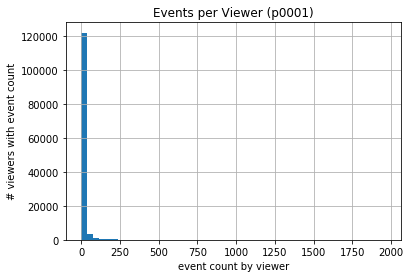

In [133]:

print('sample bucket (60 buckets generated for 12 week dataset)')
print('total events:', len(df))
print('unique viewers in bucket (1/60):', len(mpids))
MPIDS = df['mpid'].value_counts()
ax = mpids.hist(bins=50,   );
ax.set_title('Events per Viewer (p0001)')
ax.set_ylabel('# viewers with event count')
ax.set_xlabel('event count by viewer')

In [162]:
def get_events_for_mpid(mpid):
    dx = df.loc[[mpid]].sort_values('event_start_unixtime_ms', ascending=False).set_index('file')
    events = dx[['platform', 'nbc_profile', 'mvpd', 'video_end_type','resume','video_duration_watched','video_duration', 'resume_time','genre','show', 'episode_title','season','video_type', 'ip', ]]
    stats = DataFrameSummary(dx).columns_stats.T.sort_values('uniques',ascending=False)
    return events, stats

In [163]:

mpids[mpids < 20]

-6568369923895310700    19
 7868706068000704320    19
 6333175593041130060    19
 1659490398996587820    19
 974111673582157320     19
                        ..
 119183080059530640      1
-318060447199217220      1
 1032781045710253380     1
 2714025172155623700     1
 1431289747481395860     1
Name: mpid, Length: 115149, dtype: int64

In [181]:
mpid = mpid = 6053785677818666040
#mpid = 6470602331570062740 # small, 
#mpid = -2732128289763626040  # tonight show highlights, 
#mpid =  3166073724721267440 # the voice,
#mpid = -2270693790639375300 # days of our lives, 
#mpid = 5890019222452638720 # enjoys nbc service, 
#mpid = 1032781045710253380 # single record


events, stats = get_events_for_mpid(mpid)
# stats

In [183]:
with pd.option_context('max_rows', None):
    display(events)

,platform,nbc_profile,mvpd,video_end_type,resume,video_duration_watched,video_duration,resume_time,genre,show,episode_title,season,video_type,ip
file,,,,,,,,,,,,,,
NBC_App_20190827071903462735_11442.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,99,86.15,None,Drama,Lake Placid: Legacy,Not Set,None,Movie,162.198.234.72
NBC_App_20190823144646187590_25282.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,99,86.3,None,Drama,Zombie Tidal Wave,Not Set,None,Movie,162.198.234.72
NBC_App_20190818054924662535_35422.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,20,84.4666666666667,None,Drama,Nightmare Shark,Not Set,None,Movie,162.198.234.72
NBC_App_20190817151757186790_24130.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,99,86.3,None,Drama,Toxic Shark,Not Set,None,Movie,162.198.234.72
NBC_App_20190817133749525164_61459.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,4,80.25,None,Drama,Dam Sharks!,Not Set,None,Movie,162.198.234.72
NBC_App_20190815200007513023_05174.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,100,86.3,None,Drama,Ozark Sharks,Not Set,None,Movie,162.198.234.72
NBC_App_20190815181518163200_89409.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,100,86.2333333333333,None,Drama,Jersey Shore Shark Attack,Not Set,None,Movie,162.198.234.72
NBC_App_20190813055846486117_59267.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,87,80.25,None,Drama,Dam Sharks!,Not Set,None,Movie,162.198.234.72
NBC_App_20190813042850562892_45335.txt,Not Set,Unauthenticated,Comcast_SSO,Close,False,2,86.3,None,Drama,Planet of the Sharks,Not Set,None,Movie,162.198.234.72


In [175]:
DATA.loc[[]]

,batch_id,file,file_idx,asof_dt,mpid,nbc_profile,mvpd,event_name,event_type,platform,...,video_duration,video_end_type,resume,event_id,session_id,video_duration_watched,event_start_unixtime_ms,session_start_unixtime_ms,resume_time,viewer_partition
mpid,,,,,,,,,,,,,,,,,,,,,
-4876669953033466200,ve_20190814_0004,NBC_20190814083801644698_93781.txt,3607,2019-10-12T08:16:23.285543Z,-4876669953033466200,Unauthenticated,Hulu,Video End,custom_event,Android,...,85,Close,False,-3669832177594768724,5590341914492854835,0,1565771476664,1565771457203,None,0
-4876669953033466200,ve_20190824_0005,NBC_20190824135107900597_90804.txt,5793,2019-10-12T07:14:14.226814Z,-4876669953033466200,Unauthenticated,Hulu,Video End,custom_event,Android,...,86,Background,True,8124306375418696990,-3760676380171989411,23,1566654463606,1566652983121,1361,0


In [178]:
DATA[DATA.show=='Planet of the Sharks']

,batch_id,file,file_idx,asof_dt,mpid,nbc_profile,mvpd,event_name,event_type,platform,...,video_duration,video_end_type,resume,event_id,session_id,video_duration_watched,event_start_unixtime_ms,session_start_unixtime_ms,resume_time,viewer_partition
mpid,,,,,,,,,,,,,,,,,,,,,
6053785677818666040,ve_20190813_0002,NBC_App_20190813042850562892_45335.txt,1870,2019-10-12T07:57:08.578743Z,6053785677818666040,Unauthenticated,Comcast_SSO,Video End,custom_event,Not Set,...,86.3,Close,False,9009956554395163799,-3163358059255313039,2,1565670428627,None,None,0
7993687573849684500,ve_20190819_0003,NBC_20190819055546173681_91842.txt,2126,2019-10-12T05:41:27.226660Z,7993687573849684500,Unauthenticated,DIRECTV,Video End,custom_event,Android,...,86,Close,True,5615926431456348604,5938358864390377280,44,1566193846121,1566192029519,2625,0


In [172]:
with pd.option_context('max_rows', None): 
    display(DATA.show.value_counts())

Days of our Lives                                       284857
Dateline                                                126986
America's Got Talent                                    100607
This Is Us                                               59055
New Amsterdam                                            47086
Saturday Night Live                                      43441
Law & Order: Special Victims Unit                        27141
Chicago P.D.                                             26024
The InBetween                                            24425
American Ninja Warrior                                   22606
Bring the Funny                                          21672
Songland                                                 20789
The Voice                                                19652
House                                                    18355
Superstore                                               18052
The Good Place                                         

In [ ]:
{'mpid': 594429747067128960,
 'zip_code': '21214',
 'location': 'Baltimore',
 'income': 65792.0,
 'age_group': '20-30',
 'shows': [('Iron Man', 0.30769),
  ('This Is Us', 0.23077),
  ('Tia & Tamera', 0.15385),
  ('Access', 0.07692),
  ('Botched By Nature', 0.07692),
  ('Chicago P.D.', 0.07692),
  ('Songland', 0.07692)],
 'genres': [('Drama', 0.61538),
  ('Reality and Game Show', 0.30769),
  ('News and Information', 0.07692)],
 }}